In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf 

In [3]:
df= yf.download("AAPL", period="5y", interval="1d", auto_adjust=True, progress=False)
print(df.head())        

Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2020-08-13  111.872261  112.876593  110.819290  111.308083  210082000
2020-08-14  111.772575  111.862551  109.960885  111.697190  165565200
2020-08-17  111.480766  112.920392  110.853367  112.896073  119561600
2020-08-18  112.409698  112.835263  110.897122  111.232711  105633600
2020-08-19  112.550751  113.966057  112.455915  112.818250  145538000


In [4]:
df= yf.download("MSFT", period="5y", interval="1d", auto_adjust=True, progress=False)
print(df.head())

Price            Close        High         Low        Open    Volume
Ticker            MSFT        MSFT        MSFT        MSFT      MSFT
Date                                                                
2020-08-13  199.952469  202.491405  199.425519  200.661458  22588900
2020-08-14  200.144104  200.805185  198.812365  200.009973  17958900
2020-08-17  201.466293  202.338155  200.163296  200.814802  20184800
2020-08-18  202.625534  203.459064  200.441100  201.705765  21336200
2020-08-19  201.396210  203.701182  200.964032  203.115337  27627600


In [5]:
df= yf.download("GOOG", period="5y", interval="1d", auto_adjust=True, progress=False)
print(df.head())

Price           Close       High        Low       Open    Volume
Ticker           GOOG       GOOG       GOOG       GOOG      GOOG
Date                                                            
2020-08-13  75.473877  76.408325  74.954716  75.070771  29104000
2020-08-14  74.941040  75.645357  74.699973  75.335197  27096000
2020-08-17  75.450516  75.829762  74.952970  75.285989  27566000
2020-08-18  77.469505  77.661859  75.735314  75.858082  40542000
2020-08-19  76.919281  78.219050  76.741338  77.206567  33212000


In [7]:
df = yf.download("AAPL",start="2020-01-01", end="2025-08-13",interval="1d", auto_adjust=True, progress=False)
df.to_csv("AAPL_2020_to_today_daily.csv")

In [8]:
df = yf.download("MSFT",
                 start="2020-01-01", end="2025-08-13",
                 interval="1d", auto_adjust=True, progress=False)
df.to_csv("MSFT_2020_to_today_daily.csv")

In [9]:
df = yf.download("GOOG",
                 start="2020-01-01", end="2025-08-13",
                 interval="1d", auto_adjust=True, progress=False)
df.to_csv("GOOG_2020_to_today_daily.csv")

In [10]:
import pandas as pd

In [11]:
#define tickers
tickers= ['AAPL','MSFT','GOOG']

In [12]:
#Pull financials
data={}
for ticker in tickers:
    stock= yf.Ticker(ticker)
    financials=stock.financials.T

In [13]:
#Income statement
balance_sheet=stock.balance_sheet.T
cash_flow=stock.cashflow.T
data[ticker]={'financials': financials, 'balance_sheet':balance_sheet, 'cash_flow':cash_flow}
print(f"downloaded data for {ticker}")

downloaded data for GOOG


In [14]:
df_all= yf.download(
    tickers,
    period="5y",            # or: start="2020-01-01", end="2025-08-13"
    interval="1d",
    auto_adjust=True,
    progress=False,
    group_by="ticker"       # makes columns per ticker
)

In [15]:
df_all.to_csv("prices_5y_daily_APPL_MSFT_GOOG.csv")

In [16]:
for t in tickers:
    df_all[t].to_csv(f"{t}_5y_daily.csv")
    print(t, df_all[t].shape)

AAPL (1255, 5)
MSFT (1255, 5)
GOOG (1255, 5)


In [17]:
df_all = yf.download(
    ["AAPL","MSFT","GOOG"],
    start="2020-01-01", end="2025-08-13",
    interval="1d", auto_adjust=True, progress=False, group_by="ticker"
)

In [18]:
print(df_all.columns.levels)

[['AAPL', 'GOOG', 'MSFT'], ['Close', 'High', 'Low', 'Open', 'Volume']]


In [22]:
from pathlib import Path

In [26]:
import os

In [29]:
import os
import yfinance as yf
import pandas as pd

tickers = ["AAPL", "MSFT", "GOOG"]   # add more if needed
os.makedirs("data", exist_ok=True)   # create once

data = {}

# Build the dict correctly (key by the SYMBOL STRING)
for t in tickers:
    tk = yf.Ticker(t)
    data[t] = {
        "financials": tk.financials.T,
        "balance_sheet": tk.balance_sheet.T,
        "cashflow": tk.cashflow.T,   # <-- NOT 'cash_flow'
    }

# Save everything that exists
for t, items in data.items():
    for name, df in items.items():
        if df is not None and not df.empty:
            df.to_csv(os.path.join("data", f"{t}_{name}.csv"))
        else:
            print(f"[WARN] {t} {name} empty — skipped")


In [15]:
print(df.shape)        # rows, cols
print(df.index[:5])    # first dates
print(df.columns)      # columns
display(df.head())     # first 5
display(df.tail())     # last 5
display(df.sample(4)) # random 10
df.info()              # dtypes + non-null counts
df.describe()          # numeric summary

(5, 55)
DatetimeIndex(['2024-12-31', '2023-12-31', '2022-12-31', '2021-12-31',
               '2020-12-31'],
              dtype='datetime64[ns]', freq=None)
Index(['Free Cash Flow', 'Repurchase Of Capital Stock', 'Repayment Of Debt',
       'Issuance Of Debt', 'Capital Expenditure',
       'Income Tax Paid Supplemental Data', 'End Cash Position',
       'Beginning Cash Position', 'Effect Of Exchange Rate Changes',
       'Changes In Cash', 'Financing Cash Flow',
       'Cash Flow From Continuing Financing Activities',
       'Net Other Financing Charges', 'Proceeds From Stock Option Exercised',
       'Cash Dividends Paid', 'Common Stock Dividend Paid',
       'Net Common Stock Issuance', 'Common Stock Payments',
       'Net Issuance Payments Of Debt', 'Net Long Term Debt Issuance',
       'Long Term Debt Payments', 'Long Term Debt Issuance',
       'Investing Cash Flow', 'Cash Flow From Continuing Investing Activities',
       'Net Other Investing Changes', 'Net Investment Purchase A

,Free Cash Flow,Repurchase Of Capital Stock,Repayment Of Debt,Issuance Of Debt,Capital Expenditure,Income Tax Paid Supplemental Data,End Cash Position,Beginning Cash Position,Effect Of Exchange Rate Changes,Changes In Cash,...,Deferred Tax,Deferred Income Tax,Depreciation Amortization Depletion,Depreciation And Amortization,Amortization Cash Flow,Amortization Of Intangibles,Depreciation,Operating Gains Losses,Gain Loss On Investment Securities,Net Income From Continuing Operations
2024-12-31,7.276400e+10,-6.222200e+10,-1.270100e+10,1.358900e+10,-5.253500e+10,NaN,2.346600e+10,2.404800e+10,-612000000.0,3.000000e+07,...,-5.257000e+09,-5.257000e+09,1.531100e+10,1.531100e+10,NaN,NaN,1.531100e+10,-2.671000e+09,-2.671000e+09,1.001180e+11
2023-12-31,6.949500e+10,-6.150400e+10,-1.155000e+10,1.079000e+10,-3.225100e+10,1.916400e+10,2.404800e+10,2.187900e+10,-421000000.0,2.590000e+09,...,-7.763000e+09,-7.763000e+09,1.194600e+10,1.194600e+10,NaN,NaN,1.194600e+10,8.230000e+08,8.230000e+08,7.379500e+10
2022-12-31,6.001000e+10,-5.929600e+10,-5.406800e+10,5.287200e+10,-3.148500e+10,1.889200e+10,2.187900e+10,2.094500e+10,-506000000.0,1.440000e+09,...,-8.081000e+09,-8.081000e+09,1.347500e+10,1.347500e+10,641000000.0,641000000.0,1.347500e+10,5.519000e+09,5.519000e+09,5.997200e+10
2021-12-31,6.701200e+10,-5.027400e+10,-2.143500e+10,2.019900e+10,-2.464000e+10,1.341200e+10,2.094500e+10,2.646500e+10,-287000000.0,-5.233000e+09,...,1.808000e+09,1.808000e+09,1.244100e+10,1.244100e+10,886000000.0,886000000.0,1.155500e+10,-1.227000e+10,-1.227000e+10,7.603300e+10
2020-12-31,NaN,NaN,NaN,NaN,NaN,4.990000e+09,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,792000000.0,792000000.0,NaN,NaN,NaN,NaN


,Free Cash Flow,Repurchase Of Capital Stock,Repayment Of Debt,Issuance Of Debt,Capital Expenditure,Income Tax Paid Supplemental Data,End Cash Position,Beginning Cash Position,Effect Of Exchange Rate Changes,Changes In Cash,...,Deferred Tax,Deferred Income Tax,Depreciation Amortization Depletion,Depreciation And Amortization,Amortization Cash Flow,Amortization Of Intangibles,Depreciation,Operating Gains Losses,Gain Loss On Investment Securities,Net Income From Continuing Operations
2024-12-31,7.276400e+10,-6.222200e+10,-1.270100e+10,1.358900e+10,-5.253500e+10,NaN,2.346600e+10,2.404800e+10,-612000000.0,3.000000e+07,...,-5.257000e+09,-5.257000e+09,1.531100e+10,1.531100e+10,NaN,NaN,1.531100e+10,-2.671000e+09,-2.671000e+09,1.001180e+11
2023-12-31,6.949500e+10,-6.150400e+10,-1.155000e+10,1.079000e+10,-3.225100e+10,1.916400e+10,2.404800e+10,2.187900e+10,-421000000.0,2.590000e+09,...,-7.763000e+09,-7.763000e+09,1.194600e+10,1.194600e+10,NaN,NaN,1.194600e+10,8.230000e+08,8.230000e+08,7.379500e+10
2022-12-31,6.001000e+10,-5.929600e+10,-5.406800e+10,5.287200e+10,-3.148500e+10,1.889200e+10,2.187900e+10,2.094500e+10,-506000000.0,1.440000e+09,...,-8.081000e+09,-8.081000e+09,1.347500e+10,1.347500e+10,641000000.0,641000000.0,1.347500e+10,5.519000e+09,5.519000e+09,5.997200e+10
2021-12-31,6.701200e+10,-5.027400e+10,-2.143500e+10,2.019900e+10,-2.464000e+10,1.341200e+10,2.094500e+10,2.646500e+10,-287000000.0,-5.233000e+09,...,1.808000e+09,1.808000e+09,1.244100e+10,1.244100e+10,886000000.0,886000000.0,1.155500e+10,-1.227000e+10,-1.227000e+10,7.603300e+10
2020-12-31,NaN,NaN,NaN,NaN,NaN,4.990000e+09,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,792000000.0,792000000.0,NaN,NaN,NaN,NaN


,Free Cash Flow,Repurchase Of Capital Stock,Repayment Of Debt,Issuance Of Debt,Capital Expenditure,Income Tax Paid Supplemental Data,End Cash Position,Beginning Cash Position,Effect Of Exchange Rate Changes,Changes In Cash,...,Deferred Tax,Deferred Income Tax,Depreciation Amortization Depletion,Depreciation And Amortization,Amortization Cash Flow,Amortization Of Intangibles,Depreciation,Operating Gains Losses,Gain Loss On Investment Securities,Net Income From Continuing Operations
2022-12-31,6.001000e+10,-5.929600e+10,-5.406800e+10,5.287200e+10,-3.148500e+10,1.889200e+10,2.187900e+10,2.094500e+10,-506000000.0,1.440000e+09,...,-8.081000e+09,-8.081000e+09,1.347500e+10,1.347500e+10,641000000.0,641000000.0,1.347500e+10,5.519000e+09,5.519000e+09,5.997200e+10
2020-12-31,NaN,NaN,NaN,NaN,NaN,4.990000e+09,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,792000000.0,792000000.0,NaN,NaN,NaN,NaN
2023-12-31,6.949500e+10,-6.150400e+10,-1.155000e+10,1.079000e+10,-3.225100e+10,1.916400e+10,2.404800e+10,2.187900e+10,-421000000.0,2.590000e+09,...,-7.763000e+09,-7.763000e+09,1.194600e+10,1.194600e+10,NaN,NaN,1.194600e+10,8.230000e+08,8.230000e+08,7.379500e+10
2021-12-31,6.701200e+10,-5.027400e+10,-2.143500e+10,2.019900e+10,-2.464000e+10,1.341200e+10,2.094500e+10,2.646500e+10,-287000000.0,-5.233000e+09,...,1.808000e+09,1.808000e+09,1.244100e+10,1.244100e+10,886000000.0,886000000.0,1.155500e+10,-1.227000e+10,-1.227000e+10,7.603300e+10


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5 entries, 2024-12-31 to 2020-12-31
Data columns (total 55 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Free Cash Flow                                  4 non-null      float64
 1   Repurchase Of Capital Stock                     4 non-null      float64
 2   Repayment Of Debt                               4 non-null      float64
 3   Issuance Of Debt                                4 non-null      float64
 4   Capital Expenditure                             4 non-null      float64
 5   Income Tax Paid Supplemental Data               4 non-null      float64
 6   End Cash Position                               4 non-null      float64
 7   Beginning Cash Position                         4 non-null      float64
 8   Effect Of Exchange Rate Changes                 4 non-null      float64
 9   Changes In Cash           

,Free Cash Flow,Repurchase Of Capital Stock,Repayment Of Debt,Issuance Of Debt,Capital Expenditure,Income Tax Paid Supplemental Data,End Cash Position,Beginning Cash Position,Effect Of Exchange Rate Changes,Changes In Cash,...,Deferred Tax,Deferred Income Tax,Depreciation Amortization Depletion,Depreciation And Amortization,Amortization Cash Flow,Amortization Of Intangibles,Depreciation,Operating Gains Losses,Gain Loss On Investment Securities,Net Income From Continuing Operations
count,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,...,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
mean,6.732025e+10,-5.832400e+10,-2.493850e+10,2.436250e+10,-3.522775e+10,1.411450e+10,2.258450e+10,2.333425e+10,-4.565000e+08,-2.932500e+08,...,-4.823250e+09,-4.823250e+09,1.329325e+10,1.329325e+10,7.730000e+08,7.730000e+08,1.307175e+10,-2.149750e+09,-2.149750e+09,7.747950e+10
std,5.412908e+09,5.509207e+09,1.991491e+10,1.941140e+10,1.203482e+10,6.635057e+09,1.426483e+09,2.458814e+09,1.373815e+08,3.455571e+09,...,4.597705e+09,4.597705e+09,1.488373e+09,1.488373e+09,1.236002e+08,1.236002e+08,1.707307e+09,7.535209e+09,7.535209e+09,1.668015e+10
min,6.001000e+10,-6.222200e+10,-5.406800e+10,1.079000e+10,-5.253500e+10,4.990000e+09,2.094500e+10,2.094500e+10,-6.120000e+08,-5.233000e+09,...,-8.081000e+09,-8.081000e+09,1.194600e+10,1.194600e+10,6.410000e+08,6.410000e+08,1.155500e+10,-1.227000e+10,-1.227000e+10,5.997200e+10
25%,6.526150e+10,-6.168350e+10,-2.959325e+10,1.288925e+10,-3.732200e+10,1.130650e+10,2.164550e+10,2.164550e+10,-5.325000e+08,-1.285750e+09,...,-7.842500e+09,-7.842500e+09,1.231725e+10,1.231725e+10,7.165000e+08,7.165000e+08,1.184825e+10,-5.070750e+09,-5.070750e+09,7.033925e+10
50%,6.825350e+10,-6.040000e+10,-1.706800e+10,1.689400e+10,-3.186800e+10,1.615200e+10,2.267250e+10,2.296350e+10,-4.635000e+08,7.350000e+08,...,-6.510000e+09,-6.510000e+09,1.295800e+10,1.295800e+10,7.920000e+08,7.920000e+08,1.271050e+10,-9.240000e+08,-9.240000e+08,7.491400e+10
75%,7.031225e+10,-5.704050e+10,-1.241325e+10,2.836725e+10,-2.977375e+10,1.896000e+10,2.361150e+10,2.465225e+10,-3.875000e+08,1.727500e+09,...,-3.490750e+09,-3.490750e+09,1.393400e+10,1.393400e+10,8.390000e+08,8.390000e+08,1.393400e+10,1.997000e+09,1.997000e+09,8.205425e+10
max,7.276400e+10,-5.027400e+10,-1.155000e+10,5.287200e+10,-2.464000e+10,1.916400e+10,2.404800e+10,2.646500e+10,-2.870000e+08,2.590000e+09,...,1.808000e+09,1.808000e+09,1.531100e+10,1.531100e+10,8.860000e+08,8.860000e+08,1.531100e+10,5.519000e+09,5.519000e+09,1.001180e+11


In [16]:
import os
BASE = "Financial Performance"                                # change if you want
os.makedirs(BASE, exist_ok=True)
df.to_csv(os.path.join(BASE, "AAPL_5y_daily.csv"))


In [22]:
import glob, os
print("Data folder:", os.path.abspath("Finance Performance"))
print("Files:", glob.glob("Finance Performance/*.csv"))


Data folder: C:\Users\visha\Finance Performance
Files: []


In [8]:
import glob, os
print("Drives root listing:", glob.glob(r"D:\*"))   # confirm D: is real
print("Exists C src?", os.path.exists(r"C:\Users\visha\Finance Performance"))
print("Exists D dest?", os.path.exists(r"D:\Finance Performance"))


Drives root listing: ['D:\\System Volume Information', 'D:\\\xa0', 'D:\\PartA_Program2.xlsx', 'D:\\PartA_Program3.xlsx', 'D:\\PartA_Program4.xlsx', 'D:\\PartA_Program5.xlsx', 'D:\\PartA_program6.xlsx', 'D:\\DA lab', 'D:\\OS (C) - Shortcut.lnk', 'D:\\project', 'D:\\Srinidhi', 'D:\\passport', 'D:\\Anaconda', 'D:\\Downloads', 'D:\\Skin cancer', 'D:\\Headache', 'D:\\HTML', 'D:\\dobos', 'D:\\FINAL', 'D:\\Videos', 'D:\\cherry', 'D:\\New folder', 'D:\\GitHub', 'D:\\6th sem.pdf', 'D:\\cc.pdf', 'D:\\new_parent', 'D:\\Financial Performance']
Exists C src? False
Exists D dest? False


In [9]:
import os, shutil

d_path = r"D:\Financial Performance"   # use the exact name shown in your listing
print("Exists on D:", os.path.exists(d_path))
print("Sample contents:", os.listdir(d_path)[:10])


Exists on D: True
Sample contents: ['AAPL_5y_daily.csv']


In [10]:
import os, glob
import pandas as pd
import numpy as np

# ====== 0) Set base folders ======
BASE = r"D:\Financial Performance"             # <-- change if needed
CLEAN = os.path.join(BASE, "clean")
os.makedirs(CLEAN, exist_ok=True)
assert os.path.isdir(BASE), f"Base folder not found: {BASE}"

# ====== helpers ======
def _coerce_numeric(col: pd.Series) -> pd.Series:
    s = col.astype(str)
    is_pct = s.str.contains("%", na=False).any()
    s = s.str.replace(",", "", regex=False)\
         .str.replace(r"[$€£₹]", "", regex=True)\
         .str.replace(r"[^\d\.\-eE+]", "", regex=True)
    out = pd.to_numeric(s, errors="coerce")
    return out / 100 if is_pct else out

def clean_price_df(df: pd.DataFrame) -> pd.DataFrame:
    # Date handling
    if "Date" in df.columns: df = df.set_index("Date")
    df.index = pd.to_datetime(df.index, errors="coerce")
    df = df.sort_index()
    df = df[~df.index.duplicated(keep="last")]
    # numerics
    for c in df.columns: df[c] = pd.to_numeric(df[c], errors="coerce")
    # choose price column
    price_col = "Adj Close" if "Adj Close" in df.columns else ("Close" if "Close" in df.columns else None)
    if price_col is None: raise ValueError("No Adj Close/Close in prices")
    # returns
    df["ret_d"] = df[price_col].pct_change()
    # month-end return aligned to month end
    m_end = df[price_col].resample("M").last()
    df["ret_m"] = m_end.reindex(df.index).ffill().pct_change()
    return df

def clean_financials_df(df: pd.DataFrame) -> pd.DataFrame:
    # index are periods (after your earlier .T), try making them datetimes
    if df.index.name is None or df.index.name.lower() != "period":
        df.index.name = "Period"
    try:
        df.index = pd.to_datetime(df.index, errors="coerce")
    except Exception:
        pass
    df = df.sort_index()
    # coerce numerics
    for c in df.columns:
        df[c] = _coerce_numeric(df[c]) if df[c].dtype == object else pd.to_numeric(df[c], errors="coerce")
    # standard fields (only keep those present)
    rename = {
        "Total Revenue": "revenue",
        "Net Income": "net_income",
        "Gross Profit": "gross_profit",
        "Operating Income": "oper_income",
    }
    present = {k:v for k,v in rename.items() if k in df.columns}
    if present:
        df2 = df[list(present.keys())].rename(columns=present).copy()
    else:
        df2 = df.copy()
    # metrics
    if "revenue" in df2: df2["revenue_yoy"] = df2["revenue"].pct_change()
    if "net_income" in df2 and "revenue" in df2: df2["net_margin"] = df2["net_income"] / df2["revenue"]
    if "gross_profit" in df2 and "revenue" in df2: df2["gross_margin"] = df2["gross_profit"] / df2["revenue"]
    if "oper_income" in df2 and "revenue" in df2: df2["oper_margin"] = df2["oper_income"] / df2["revenue"]
    return df2

written = []

# ====== 1) Clean PRICE CSVs ======
price_files = glob.glob(os.path.join(BASE, "**", "*_daily.csv"), recursive=True)
for p in price_files:
    try:
        df = pd.read_csv(p, parse_dates=["Date"]) if "Date" in pd.read_csv(p, nrows=0).columns else pd.read_csv(p)
        df_clean = clean_price_df(df)
        out = os.path.join(CLEAN, os.path.splitext(os.path.basename(p))[0] + "_clean.csv")
        df_clean.to_csv(out)
        written.append(out)
    except Exception as e:
        print(f"[PRICE][SKIP] {p}: {e}")

# ====== 2) Clean FINANCIALS CSVs ======
fin_patterns = ["*_financials.csv", "*_balance_sheet.csv", "*_cashflow.csv", "*_cash_flow.csv"]
fin_files = []
for pat in fin_patterns:
    fin_files += glob.glob(os.path.join(BASE, "**", pat), recursive=True)

for p in sorted(set(fin_files)):
    try:
        df = pd.read_csv(p, index_col=0)
        df_clean = clean_financials_df(df)
        out = os.path.join(CLEAN, os.path.splitext(os.path.basename(p))[0] + "_clean.csv")
        df_clean.to_csv(out)
        written.append(out)
    except Exception as e:
        print(f"[FIN][SKIP] {p}: {e}")

print(f"\nWrote {len(written)} cleaned files to:\n{CLEAN}")
for w in written[:10]:
    print(" -", w)
if len(written) > 10:
    print(" ...")


[PRICE][SKIP] D:\Financial Performance\AAPL_5y_daily.csv: No Adj Close/Close in prices

Wrote 0 cleaned files to:
D:\Financial Performance\clean


In [11]:
import pandas as pd
p = r"D:\Financial Performance\AAPL_5y_daily.csv"
hdr = pd.read_csv(p, nrows=5)
print("Columns:", list(hdr.columns))
print(hdr.head(2))


Columns: ['Unnamed: 0', 'Free Cash Flow', 'Repurchase Of Capital Stock', 'Repayment Of Debt', 'Issuance Of Debt', 'Capital Expenditure', 'Income Tax Paid Supplemental Data', 'End Cash Position', 'Beginning Cash Position', 'Effect Of Exchange Rate Changes', 'Changes In Cash', 'Financing Cash Flow', 'Cash Flow From Continuing Financing Activities', 'Net Other Financing Charges', 'Proceeds From Stock Option Exercised', 'Cash Dividends Paid', 'Common Stock Dividend Paid', 'Net Common Stock Issuance', 'Common Stock Payments', 'Net Issuance Payments Of Debt', 'Net Long Term Debt Issuance', 'Long Term Debt Payments', 'Long Term Debt Issuance', 'Investing Cash Flow', 'Cash Flow From Continuing Investing Activities', 'Net Other Investing Changes', 'Net Investment Purchase And Sale', 'Sale Of Investment', 'Purchase Of Investment', 'Net Business Purchase And Sale', 'Purchase Of Business', 'Net PPE Purchase And Sale', 'Purchase Of PPE', 'Operating Cash Flow', 'Cash Flow From Continuing Operating A

In [15]:
import os, pandas as pd, numpy as np, yfinance as yf

# ---- configure ----
TICKERS = ["AAPL","MSFT","GOOG"]                       # add more
OUTDIR  = r"D:\Financial Performance\clean"            # where to save
os.makedirs(OUTDIR, exist_ok=True)

# column name fallbacks by metric (Yahoo labels vary)
COLS = {
    "revenue": ["Total Revenue","Revenue"],
    "net_income": ["Net Income","Net Income Common Stockholders","Net Income Applicable To Common Shares"],
    "gross_profit": ["Gross Profit"],
    "total_assets": ["Total Assets"],
    "shareholders_equity": ["Total Stockholder Equity","Total Stockholders Equity","Stockholders Equity","Total Equity"],
    "operating_cash_flow": [
        "Operating Cash Flow",
        "Cash Flow From Continuing Operating Activities",
        "Total Cash From Operating Activities",
        "Net Cash Provided By Operating Activities",
    ],
}

def _coerce_numeric_frame(df: pd.DataFrame) -> pd.DataFrame:
    out = df.copy()
    for c in out.columns:
        out[c] = pd.to_numeric(out[c], errors="coerce")
    return out

def _pick(series_frame: pd.DataFrame, candidates: list[str]) -> pd.Series:
    for c in candidates:
        if c in series_frame.columns:
            return series_frame[c]
    return pd.Series(index=series_frame.index, dtype="float64")
from typing import Optional
from IPython.display import display  # so display(...) works in Jupyter

def _latest_shares(tkr) -> Optional[float]:
    """Best-effort shares outstanding (last known)."""
    # try detailed history
    try:
        s = tkr.get_shares_full()
        if s is not None and not s.empty:
            return float(s.iloc[-1])
    except Exception:
        pass
    # fallback: fast_info
    try:
        val = getattr(tkr, "fast_info", {}).get("shares", None)
        return float(val) if val is not None else None
    except Exception:
        return None

rows = []
for t in TICKERS:
    tk = yf.Ticker(t)

    fin = tk.financials.T if tk.financials is not None else pd.DataFrame()
    bs  = tk.balance_sheet.T if tk.balance_sheet is not None else pd.DataFrame()
    cf  = tk.cashflow.T if tk.cashflow is not None else pd.DataFrame()

    # index = period, ensure datetime + sorted
    for df in (fin, bs, cf):
        if not df.empty:
            df.index = pd.to_datetime(df.index, errors="coerce")
    fin = _coerce_numeric_frame(fin.sort_index())
    bs  = _coerce_numeric_frame(bs.sort_index())
    cf  = _coerce_numeric_frame(cf.sort_index())

    # align on union of periods
    idx = fin.index.union(bs.index).union(cf.index)
    fin, bs, cf = fin.reindex(idx), bs.reindex(idx), cf.reindex(idx)

    metrics = pd.DataFrame(index=idx)
    metrics["ticker"] = t
    metrics["revenue"] = _pick(fin, COLS["revenue"])
    metrics["net_income"] = _pick(fin, COLS["net_income"])
    metrics["gross_profit"] = _pick(fin, COLS["gross_profit"])
    metrics["total_assets"] = _pick(bs, COLS["total_assets"])
    metrics["shareholders_equity"] = _pick(bs, COLS["shareholders_equity"])
    metrics["operating_cash_flow"] = _pick(cf, COLS["operating_cash_flow"])

    # optional: shares outstanding (point-in-time, will repeat across rows)
    shares = _latest_shares(tk)
    metrics["shares_outstanding"] = shares

    # optional: margins/growth
    if "revenue" in metrics:
        metrics["net_margin"] = metrics["net_income"] / metrics["revenue"]
        metrics["gross_margin"] = metrics["gross_profit"] / metrics["revenue"]
        metrics["revenue_yoy"] = metrics["revenue"].pct_change()
        metrics["net_income_yoy"] = metrics["net_income"].pct_change()
        metrics["cfo_yoy"] = metrics["operating_cash_flow"].pct_change()

    rows.append(metrics)

# tidy table
key_metrics = pd.concat(rows).reset_index().rename(columns={"index":"period"})
key_metrics = key_metrics.sort_values(["ticker","period"])

# save + preview
out_csv = os.path.join(OUTDIR, "key_metrics.csv")
key_metrics.to_csv(out_csv, index=False)
print("Wrote:", out_csv)
display(key_metrics.tail(10))


Wrote: D:\Financial Performance\clean\key_metrics.csv


,period,ticker,revenue,net_income,gross_profit,total_assets,shareholders_equity,operating_cash_flow,shares_outstanding,net_margin,gross_margin,revenue_yoy,net_income_yoy,cfo_yoy
10,2020-12-31,GOOG,NaN,NaN,NaN,NaN,NaN,NaN,1.206820e+10,NaN,NaN,NaN,NaN,NaN
11,2021-12-31,GOOG,2.576370e+11,7.603300e+10,1.466980e+11,3.592680e+11,2.516350e+11,9.165200e+10,1.206820e+10,0.295117,0.569398,NaN,NaN,NaN
12,2022-12-31,GOOG,2.828360e+11,5.997200e+10,1.566330e+11,3.652640e+11,2.561440e+11,9.149500e+10,1.206820e+10,0.212038,0.553794,0.097808,-0.211237,-0.001713
13,2023-12-31,GOOG,3.073940e+11,7.379500e+10,1.740620e+11,4.023920e+11,2.833790e+11,1.017460e+11,1.206820e+10,0.240066,0.566250,0.086828,0.230491,0.112039
14,2024-12-31,GOOG,3.500180e+11,1.001180e+11,2.037120e+11,4.502560e+11,3.250840e+11,1.252990e+11,1.206820e+10,0.286037,0.582004,0.138662,0.356704,0.231488
5,2021-06-30,MSFT,NaN,NaN,NaN,NaN,NaN,NaN,7.433170e+09,NaN,NaN,NaN,NaN,NaN
6,2022-06-30,MSFT,1.982700e+11,7.273800e+10,1.356200e+11,3.648400e+11,1.665420e+11,8.903500e+10,7.433170e+09,0.366863,0.684017,NaN,NaN,NaN
7,2023-06-30,MSFT,2.119150e+11,7.236100e+10,1.460520e+11,4.119760e+11,2.062230e+11,8.758200e+10,7.433170e+09,0.341462,0.689201,0.068820,-0.005183,-0.016319
8,2024-06-30,MSFT,2.451220e+11,8.813600e+10,1.710080e+11,5.121630e+11,2.684770e+11,1.185480e+11,7.433170e+09,0.359560,0.697644,0.156700,0.218004,0.353566
9,2025-06-30,MSFT,2.817240e+11,1.018320e+11,1.938930e+11,6.190030e+11,3.434790e+11,1.361620e+11,7.433170e+09,0.361460,0.688237,0.149322,0.155396,0.148581


In [4]:
print(type(df), df.shape)
print(df.columns.tolist())
df.head()


<class 'pandas.core.frame.DataFrame'> (1410, 6)
[('Date', ''), ('Close', 'AAPL'), ('High', 'AAPL'), ('Low', 'AAPL'), ('Open', 'AAPL'), ('Volume', 'AAPL')]


Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2020-01-02,72.538513,72.598892,71.292304,71.545890,135480400
1,2020-01-03,71.833290,72.594055,71.608685,71.765667,146322800
2,2020-01-06,72.405678,72.444321,70.703012,70.954188,118387200
3,2020-01-07,72.065155,72.671348,71.845377,72.415345,108872000
4,2020-01-08,73.224403,73.526295,71.768079,71.768079,132079200


In [12]:
import yfinance as yf, pandas as pd, numpy as np

def pick(df, *names):
    """Return the first matching column, or an empty Series if none exist."""
    for n in names:
        if n in df.columns:
            return df[n]
    return pd.Series(index=df.index, dtype="float64")

def metrics_for(ticker: str) -> pd.DataFrame:
    tk  = yf.Ticker(ticker)
    fin = tk.financials.T if tk.financials is not None else pd.DataFrame()     # income stmt
    bs  = tk.balance_sheet.T if tk.balance_sheet is not None else pd.DataFrame()# balance sheet

    # make the index time-like & align periods
    for d in (fin, bs):
        if not d.empty:
            d.index = pd.to_datetime(d.index, errors="coerce")
    idx = fin.index.union(bs.index).sort_values()
    fin, bs = fin.reindex(idx), bs.reindex(idx)

    m = pd.DataFrame(index=idx)
    m["Ticker"] = ticker
    m["Revenue"]              = pick(fin, "Total Revenue", "Revenue")
    m["Net Income"]           = pick(fin, "Net Income", "Net Income Common Stockholders",
                                     "Net Income Applicable To Common Shares",
                                     "Net Income From Continuing Operations")
    m["Gross Profit"]         = pick(fin, "Gross Profit")
    m["Total Assets"]         = pick(bs,  "Total Assets")
    m["Shareholders Equity"]  = pick(bs,  "Total Stockholder Equity", "Total Stockholders Equity",
                                     "Stockholders Equity", "Total Equity")
    m["Total Liabilities"]    = pick(bs,  "Total Liabilities", "Total Liabilities Net Minority Interest")

    # Ratios
    m["Net Profit Margin"] = m["Net Income"] / m["Revenue"]
    avg_eq = (m["Shareholders Equity"] + m["Shareholders Equity"].shift()) / 2
    m["ROE"] = m["Net Income"] / avg_eq.replace(0, np.nan)
    m["Debt to Equity"] = m["Total Liabilities"] / m["Shareholders Equity"].replace(0, np.nan)
    return m

# Example: multiple tickers
tickers = ["AAPL", "MSFT", "GOOG"]
key_metrics = (pd.concat([metrics_for(t) for t in tickers])
               .reset_index().rename(columns={"index":"Period"})
               .sort_values(["Ticker","Period"]))
key_metrics.tail(10)


,Period,Ticker,Revenue,Net Income,Gross Profit,Total Assets,Shareholders Equity,Total Liabilities,Net Profit Margin,ROE,Debt to Equity
10,2020-12-31,GOOG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,2021-12-31,GOOG,2.576370e+11,7.603300e+10,1.466980e+11,3.592680e+11,2.516350e+11,1.076330e+11,0.295117,NaN,0.427735
12,2022-12-31,GOOG,2.828360e+11,5.997200e+10,1.566330e+11,3.652640e+11,2.561440e+11,1.091200e+11,0.212038,0.236213,0.426010
13,2023-12-31,GOOG,3.073940e+11,7.379500e+10,1.740620e+11,4.023920e+11,2.833790e+11,1.190130e+11,0.240066,0.273556,0.419978
14,2024-12-31,GOOG,3.500180e+11,1.001180e+11,2.037120e+11,4.502560e+11,3.250840e+11,1.251720e+11,0.286037,0.329085,0.385045
5,2021-06-30,MSFT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2022-06-30,MSFT,1.982700e+11,7.273800e+10,1.356200e+11,3.648400e+11,1.665420e+11,1.982980e+11,0.366863,NaN,1.190679
7,2023-06-30,MSFT,2.119150e+11,7.236100e+10,1.460520e+11,4.119760e+11,2.062230e+11,2.057530e+11,0.341462,0.388239,0.997721
8,2024-06-30,MSFT,2.451220e+11,8.813600e+10,1.710080e+11,5.121630e+11,2.684770e+11,2.436860e+11,0.359560,0.371333,0.907661
9,2025-06-30,MSFT,2.817240e+11,1.018320e+11,1.938930e+11,6.190030e+11,3.434790e+11,2.755240e+11,0.361460,0.332808,0.802157


In [14]:
#One clear DataFrame for all table tickers  
import yfinance as yf, pandas as pd, numpy as np

def pick(df, *names):
    for n in names:
        if n in df.columns: return df[n]
    return pd.Series(index=df.index, dtype="float64")

def metrics_for(ticker: str) -> pd.DataFrame:
    tk  = yf.Ticker(ticker)
    fin = tk.financials.T if tk.financials is not None else pd.DataFrame()     # income stmt (annual)
    bs  = tk.balance_sheet.T if tk.balance_sheet is not None else pd.DataFrame()# balance sheet (annual)

    for d in (fin, bs):
        if not d.empty: d.index = pd.to_datetime(d.index, errors="coerce")
    idx = fin.index.union(bs.index).sort_values()
    fin, bs = fin.reindex(idx), bs.reindex(idx)

    m = pd.DataFrame(index=idx)
    m["Ticker"] = ticker
    m["Revenue"]             = pick(fin, "Total Revenue","Revenue")
    m["Net Income"]          = pick(fin, "Net Income","Net Income Common Stockholders",
                                    "Net Income Applicable To Common Shares",
                                    "Net Income From Continuing Operations")
    m["Gross Profit"]        = pick(fin, "Gross Profit")
    m["Total Assets"]        = pick(bs,  "Total Assets")
    m["Shareholders Equity"] = pick(bs,  "Total Stockholder Equity","Total Stockholders Equity",
                                    "Stockholders Equity","Total Equity")
    m["Total Liabilities"]   = pick(bs,  "Total Liabilities","Total Liabilities Net Minority Interest")

    # Ratios
    m["Net Profit Margin"] = m["Net Income"] / m["Revenue"]
    avg_eq = (m["Shareholders Equity"] + m["Shareholders Equity"].shift()) / 2
    m["ROE"] = m["Net Income"] / avg_eq.replace(0, np.nan)
    m["Debt to Equity"] = m["Total Liabilities"] / m["Shareholders Equity"].replace(0, np.nan)
    return m

tickers = ["AAPL","MSFT","GOOG"]
key_metrics = (pd.concat([metrics_for(t) for t in tickers])
               .reset_index()
               .rename(columns={"index":"Period"})
               .sort_values(["Ticker","Period"]))
key_metrics

,Period,Ticker,Revenue,Net Income,Gross Profit,Total Assets,Shareholders Equity,Total Liabilities,Net Profit Margin,ROE,Debt to Equity
0,2020-09-30,AAPL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-09-30,AAPL,3.658170e+11,9.468000e+10,1.528360e+11,3.510020e+11,6.309000e+10,2.879120e+11,0.258818,NaN,4.563512
2,2022-09-30,AAPL,3.943280e+11,9.980300e+10,1.707820e+11,3.527550e+11,5.067200e+10,3.020830e+11,0.253096,1.754593,5.961537
3,2023-09-30,AAPL,3.832850e+11,9.699500e+10,1.691480e+11,3.525830e+11,6.214600e+10,2.904370e+11,0.253062,1.719495,4.673462
4,2024-09-30,AAPL,3.910350e+11,9.373600e+10,1.806830e+11,3.649800e+11,5.695000e+10,3.080300e+11,0.239713,1.574125,5.408780
10,2020-12-31,GOOG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,2021-12-31,GOOG,2.576370e+11,7.603300e+10,1.466980e+11,3.592680e+11,2.516350e+11,1.076330e+11,0.295117,NaN,0.427735
12,2022-12-31,GOOG,2.828360e+11,5.997200e+10,1.566330e+11,3.652640e+11,2.561440e+11,1.091200e+11,0.212038,0.236213,0.426010
13,2023-12-31,GOOG,3.073940e+11,7.379500e+10,1.740620e+11,4.023920e+11,2.833790e+11,1.190130e+11,0.240066,0.273556,0.419978
14,2024-12-31,GOOG,3.500180e+11,1.001180e+11,2.037120e+11,4.502560e+11,3.250840e+11,1.251720e+11,0.286037,0.329085,0.385045


In [15]:
key_metrics.to_csv(r"D:\Financial Performance\clean\key_metrics.csv", index=False)


In [17]:
#Visualizing Trends 
#Line Chart     for revenue and Netincome over time  
#Bar chart      Profit margins 
#Table          All ratios side-by-side for 3 companies 
# run using plot (matplotlib or seaborn)

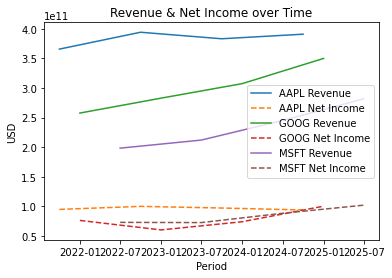

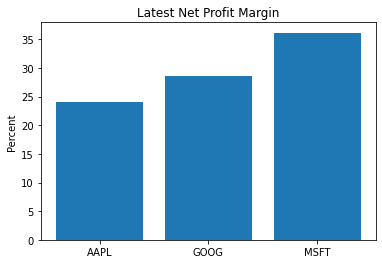

  Ticker     Period  Net Profit Margin       ROE  Debt to Equity
0   AAPL 2024-09-30           0.239713  1.574125        5.408780
1   GOOG 2024-12-31           0.286037  0.329085        0.385045
2   MSFT 2025-06-30           0.361460  0.332808        0.802157


In [19]:
# Visualizing Trends (matplotlib only)

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1) Get the data (from variable 'key_metrics' if present; else from CSV)
try:
    km
except NameError:
    csv_path = r"D:\Financial Performance\clean\key_metrics.csv"
    if not os.path.exists(csv_path):
        raise FileNotFoundError("key_metrics not in memory and CSV not found at:\n" + csv_path)
    km = pd.read_csv(csv_path, parse_dates=["Period"])

# Basic hygiene
km["Period"] = pd.to_datetime(km["Period"], errors="coerce")
km = km.dropna(subset=["Period"]).sort_values(["Ticker","Period"])

# Ensure required columns exist (compute if missing)
if "Net Profit Margin" not in km.columns and {"Net Income","Revenue"}.issubset(km.columns):
    km["Net Profit Margin"] = km["Net Income"] / km["Revenue"]
if "ROE" not in km.columns and {"Net Income","Shareholders Equity"}.issubset(km.columns):
    avg_eq = (km["Shareholders Equity"] + km["Shareholders Equity"].shift()) / 2
    km["ROE"] = km["Net Income"] / avg_eq.replace(0, np.nan)
# Debt to Equity only if we have liabilities
if "Debt to Equity" not in km.columns and {"Total Liabilities","Shareholders Equity"}.issubset(km.columns):
    km["Debt to Equity"] = km["Total Liabilities"] / km["Shareholders Equity"].replace(0, np.nan)

# — Line chart: Revenue & Net Income over time (one chart, multiple lines)
fig, ax = plt.subplots()
for t in km["Ticker"].unique():
    kmt = km[km["Ticker"] == t].set_index("Period")
    if "Revenue" in kmt and "Net Income" in kmt:
        ax.plot(kmt.index, kmt["Revenue"].values, label=f"{t} Revenue")
        ax.plot(kmt.index, kmt["Net Income"].values, linestyle="--", label=f"{t} Net Income")
ax.set_title("Revenue & Net Income over Time")
ax.set_xlabel("Period")
ax.set_ylabel("USD")
ax.legend()
plt.show()

# — Bar chart: latest Net Profit Margin by ticker
latest = km.sort_values("Period").groupby("Ticker", as_index=False).tail(1)
if "Net Profit Margin" in latest:
    fig, ax = plt.subplots()
    # If margin is fraction, convert to %
    vals = latest["Net Profit Margin"].values * (100.0 if latest["Net Profit Margin"].max() < 1.0 else 1.0)
    ax.bar(latest["Ticker"], vals)
    ax.set_title("Latest Net Profit Margin")
    ax.set_ylabel("Percent" if vals.max() <= 100 else "Ratio")
    plt.show()

# — Table: all ratios side-by-side for the 3 companies (latest year)
cols = [c for c in ["Net Profit Margin","ROE","Debt to Equity"] if c in latest.columns]
table = latest[["Ticker","Period"] + cols].reset_index(drop=True)
print(table)


# Insights
-MSFT Net margin 36.1% > GOOG 28.6% > APPL 24.0%

-MSFT: Best profitability (36%)with strong ROE ~33% and high quality earnings, balanced sheet.

-ROE reality check: AAPL 157% is inflated by a tiny equity base from massive buybacks and not economically comparable; On a like-for-like basis, MSFT ~33% ≈ GOOG ~33%.

-GOOG:Solid margins, ROE ~33%, and lowest levearge (~0.38).